#Breve explicacion 
En este cuaderno se importa el archivo .csv que resume las características de las imágenes que componen al dataset Padchest, se seleccionan aquellas que van a ser utilizadas en este trabajo y se les asigna pertenencia alguno de los grupos: train (o validation) y test.

#Montaje y Carga



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino

/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino


In [3]:
import pandas as pd
import numpy as np
import os
from skimage.io import imread
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 

# Preprocesamiento

In [4]:
# CSV descargado en conjunto con la base de datos.Contiene mucha mas información que la que necesitamos.
df = pd.read_csv('PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,MethodProjection,Pediatric,Modality_DICOM,Manufacturer_DICOM,PhotometricInterpretation_DICOM,PixelRepresentation_DICOM,PixelAspectRatio_DICOM,SpatialResolution_DICOM,BitsStored_DICOM,WindowCenter_DICOM,WindowWidth_DICOM,Rows_DICOM,Columns_DICOM,XRayTubeCurrent_DICOM,Exposure_DICOM,ExposureInuAs_DICOM,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
0,0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930.0,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2092,2251,1728,1872,250,2,2500,10,-1.42,4765777,sin hallazg patolog edad pacient .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[]
1,1,135803415504923515076821959678074435083_fzis7d...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,LATERAL,L,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2631,2065,3296,3236,400,10,10000,25,None,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
2,2,135803415504923515076821959678074435083_fzis7b...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2155,2880,3572,3732,320,3,3200,10,None,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']
3,3,113855343774216031107737439268243531979_3k951l...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,POSTEROANTERIOR,PA,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2472,2325,3584,3240,400,3,3200,8,None,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151']
4,4,113855343774216031107737439268243531979_3k951n...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,LATERAL,L,Manual review of DICOM fields,No,CR,ImagingDynamicsCompanyLtd,MONOCHROME2,0,None,None,12,2853,1871,3732,2908,320,6,6400,20,None,4955977,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151']


In [5]:
# Borramos las imágenes anotadas automáticamente, porque fueron clasificadas por un algoritmo capaz de clasificar entre L y PA. 
#No es lo suficientemente confiable y va a traer ruido para nuestro problema. Además, la mayor parte de las imágenes fueron anotadas a mano.
df2 = df[ df['MethodProjection'] == 'Manual review of DICOM fields' ]
print(len(df))
print(len(df2))

160861
145735


In [7]:
# Analizamos las proyecciones disponibles y sus cantidades. 
df2.groupby(df2["Projection"]).count()

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,MethodProjection,Pediatric,Modality_DICOM,Manufacturer_DICOM,PhotometricInterpretation_DICOM,PixelRepresentation_DICOM,PixelAspectRatio_DICOM,SpatialResolution_DICOM,BitsStored_DICOM,WindowCenter_DICOM,WindowWidth_DICOM,Rows_DICOM,Columns_DICOM,XRayTubeCurrent_DICOM,Exposure_DICOM,ExposureInuAs_DICOM,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
Projection,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AP,4559,4559,4559,4559,4559,4559,4559,4559,474,4559,4559,4559,4559,4559,4559,4559,4559,4559,4559,4559,4559,4559,4559,4559,4559,4559,4559,4559,4556,4559,4556,4556,4556,4556,4556
AP_horizontal,14346,14346,14346,14346,14346,14346,14346,14346,0,14346,14346,14346,14346,14346,14346,14346,14346,14346,14346,14346,14346,14346,14346,14346,14346,14346,14346,14346,14335,14346,14335,14335,14335,14335,14335
COSTAL,630,630,630,630,630,630,630,630,0,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630
EXCLUDE,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
L,42519,42519,42519,42519,42519,42519,42516,42519,27916,42519,42519,42519,42519,42519,42519,42519,42519,42519,42519,42519,42519,42519,42519,42519,42519,42519,42519,42519,42496,42519,42499,42499,42499,42499,42499
PA,83670,83670,83670,83670,83670,83670,83667,83668,63375,83670,83670,83670,83670,83670,83670,83670,83670,83670,83670,83670,83670,83670,83670,83670,83670,83670,83670,83670,83599,83670,83609,83609,83609,83609,83609


In [8]:
#Me quedo solo con las carpetas que voy a comenzar utilizando.
#En realidad fueron las que finalmente se utilizaron ya que el problema pudo ser resuelto sin necesidad de más.
df3 = df2[df2.ImageDir < 8]

In [9]:
# Cuántas imágenes tengo efectivamente por clase en las carpetas que uso.
# Se excluyeron del modelo las AP  y Costal porque existen cantidades de imágenes mucho menores y además dichas radiografías poseen menor relevancia clínica.
df3.groupby(df3["Projection"]).count()

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,MethodProjection,Pediatric,Modality_DICOM,Manufacturer_DICOM,PhotometricInterpretation_DICOM,PixelRepresentation_DICOM,PixelAspectRatio_DICOM,SpatialResolution_DICOM,BitsStored_DICOM,WindowCenter_DICOM,WindowWidth_DICOM,Rows_DICOM,Columns_DICOM,XRayTubeCurrent_DICOM,Exposure_DICOM,ExposureInuAs_DICOM,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
Projection,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AP,362,362,362,362,362,362,362,362,76,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362
AP_horizontal,1087,1087,1087,1087,1087,1087,1087,1087,0,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1086,1087,1087,1087,1087,1087,1087
COSTAL,10,10,10,10,10,10,10,10,0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
L,7133,7133,7133,7133,7133,7133,7133,7133,3511,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7129,7133,7133,7133,7133,7133,7133
PA,13578,13578,13578,13578,13578,13578,13578,13578,8642,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13568,13578,13578,13578,13578,13578,13578


In [10]:
# observamos un ejemplo de cada una de las proyecciones disponibles en el DS.
AP = df[df['Projection']=='AP'][['ImageID','ImageDir']].values[0]
COS = df[df['Projection']=='COSTAL'][['ImageID','ImageDir']].values[0]
AP_H = df[df['Projection']=='AP_horizontal'][['ImageID','ImageDir']].values[0]
L = df[df['Projection']=='L'][['ImageID','ImageDir']].values[0]
PA = df[df['Projection']=='PA'][['ImageID','ImageDir']].values[0]
img_AP = imread(os.path.join('DS_comp_nodef/' + str(AP[1]),AP[0]))
img_AP_h = imread(os.path.join('DS_comp_nodef/'+ str(AP_H[1]),AP_H[0]))
img_cos = imread(os.path.join('DS_comp_nodef/'+ str(COS[1]),COS[0]))
img_L = imread(os.path.join('DS_comp_nodef/'+ str(L[1]),L[0]))
img_PA = imread(os.path.join('DS_comp_nodef/'+ str(PA[1]),PA[0]))

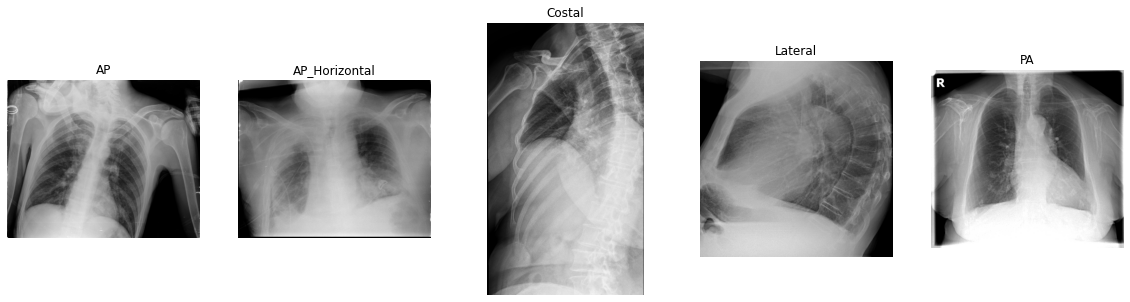

In [14]:
fig,axs=plt.subplots(1,5,figsize=(20,5))
axs[0].imshow(img_AP,cmap='gray')
axs[0].set_title('AP')
axs[1].imshow(img_AP_h,cmap='gray')
axs[1].set_title('AP_Horizontal')
axs[2].imshow(img_cos,cmap='gray')
axs[2].set_title('Costal')
axs[3].imshow(img_L,cmap='gray')
axs[3].set_title('Lateral')
axs[4].imshow(img_PA,cmap='gray')
axs[4].set_title('PA')
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[2].set_axis_off()
axs[3].set_axis_off()
axs[4].set_axis_off()

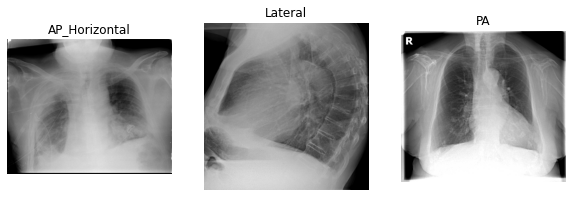

In [15]:
# Las clases con las que vamos a trabajar.
fig,axs=plt.subplots(1,3,figsize=(10,5))
axs[0].imshow(img_AP_h,cmap='gray')
axs[0].set_title('AP_Horizontal')
axs[1].imshow(img_L,cmap='gray')
axs[1].set_title('Lateral')
axs[2].imshow(img_PA,cmap='gray')
axs[2].set_title('PA')
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[2].set_axis_off()

In [ ]:
#Escogemos las proyecciones del DS.
df4 = df3.loc[(df3.Projection =='L')| (df3.Projection =='PA') | (df3.Projection =='AP_horizontal')]

In [ ]:
# Cantidad por clase.
df4.groupby(df4["Projection"]).count()

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,MethodProjection,Pediatric,Modality_DICOM,Manufacturer_DICOM,PhotometricInterpretation_DICOM,PixelRepresentation_DICOM,PixelAspectRatio_DICOM,SpatialResolution_DICOM,BitsStored_DICOM,WindowCenter_DICOM,WindowWidth_DICOM,Rows_DICOM,Columns_DICOM,XRayTubeCurrent_DICOM,Exposure_DICOM,ExposureInuAs_DICOM,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
Projection,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AP_horizontal,1087,1087,1087,1087,1087,1087,1087,1087,0,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1087,1086,1087,1087,1087,1087,1087,1087
L,7133,7133,7133,7133,7133,7133,7133,7133,3511,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7133,7129,7133,7133,7133,7133,7133,7133
PA,13578,13578,13578,13578,13578,13578,13578,13578,8642,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13578,13568,13578,13578,13578,13578,13578,13578


#Balance de Clases

In [16]:
#Cantidad de imágenes por clase. Van a ser de utilidad para ver como entrenó el modelo.
sum = (1087+7133+13578)
lik_APh = 1087/sum
lik_PA = 13578/sum
lik_L = 7133/sum
[lik_APh,lik_PA,lik_L]

[0.04986696027158455, 0.6229011835948252, 0.32723185613359024]

([<matplotlib.axis.YTick at 0x7fbbe33f68d0>,
 [Text(0, 0, 'AP'), Text(0, 0, 'L'), Text(0, 0, 'PA')])

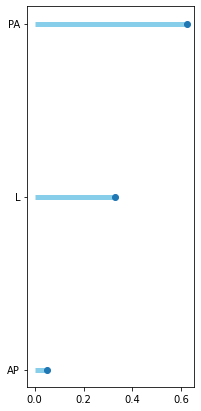

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame({'Vista':['PA','L','AP'], 'Cantidad de Imágenes':[lik_PA,lik_L,lik_APh] })
my_range=range(1,len(df.index)+1)
ordered_df = df.sort_values(by='Cantidad de Imágenes')
plt.figure(figsize=(3,7))
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Cantidad de Imágenes'], color='skyblue',linewidth=5)
plt.plot(ordered_df['Cantidad de Imágenes'], my_range, "o")
plt.yticks(my_range, ordered_df['Vista'])
#plt.axis('off')

#Split

In [ ]:
(X_train_valid, X_test, y_train_valid, y_test) = train_test_split(df4[['ImageID','ImageDir']].to_numpy(),df4['Projection'].to_numpy(),test_size=0.2,random_state=42,stratify=df4['Projection'].to_numpy())

In [ ]:
X_test

array([['311802754252080848892022752366174051604_x6lhat.png', 6],
       ['96668290996217107902574095490828411428_5qflsf.png', 1],
       ['325955568157381730588789940897433920764_osz9tw.png', 5],
       ...,
       ['64947154984935334365130497226051564059_pitgkg.png', 3],
       ['279030565682766652962677585643686847404_8ngkge.png', 2],
       ['99023930407570799422496689959954633596_d07nt4.png', 4]],
      dtype=object)

In [ ]:
df_train = pd.DataFrame({'ImageID':X_train_valid[:,0],'ImageDir':X_train_valid[:,1], 'Projection':y_train_valid})
df_test = pd.DataFrame({'ImageID':X_test[:,0],'ImageDir':X_test[:,1], 'Projection':y_test})

In [ ]:
df_train["ImageID"]= df_train["ImageDir"].astype('str').str.cat(df_train["ImageID"], sep ="/")
df_test["ImageID"] = df_test["ImageDir"].astype('str').str.cat(df_test["ImageID"], sep ="/")

In [ ]:
df_test.head()

,ImageID,ImageDir,Projection
0,6/311802754252080848892022752366174051604_x6lh...,6,PA
1,1/96668290996217107902574095490828411428_5qfls...,1,L
2,5/325955568157381730588789940897433920764_osz9...,5,PA
3,2/195647396496146564772978522127541201018_nyaw...,2,PA
4,2/129810233826713657218661530488047430717_-nvz...,2,PA


# Guardado

In [ ]:
df_train.to_excel("train0-7.xlsx")
df_test.to_excel("test0-7.xlsx")

#Revisión

In [ ]:
df_train=pd.read_excel("train0-7.xlsx")
df_test=pd.read_excel("test0-7.xlsx")

In [ ]:
df_train

,Unnamed: 0,ImageID,ImageDir,Projection
0,0,0/209046467925082585123438173056951670828_2yf7...,0,PA
1,1,1/317153195138727022241940825334565644346_pm1t...,1,PA
2,2,1/157752956223429585284471889321633028328_s661...,1,PA
3,3,2/116049923418608239865298302562509374260_5i35...,2,AP_horizontal
4,4,1/335059767833946941543878820205593617354_h5pe...,1,L
...,...,...,...,...
17433,17433,6/109629994783055558159663901799709452741_lp06...,6,PA
17434,17434,4/17550048962462292354390950562258261629_4enke...,4,PA
17435,17435,5/221707020021396800591902578337530315742_vh7j...,5,PA
17436,17436,1/194600924615827283147265593297145671589_z7g8...,1,PA


In [ ]:
df_train["ImageID"].values[2]

'1/176762271982326176295862344583858026971_aduh00.png'

In [ ]:
img = imread('DS_comp_nodef/'+ df_train["ImageID"].values[0])
img2 = imread('DS_comp_nodef/'+ df_train["ImageID"].values[1])
img3 = imread('DS_comp_nodef/'+ df_train["ImageID"].values[14793])
fig,axs=plt.subplots(1,3,figsize=(10,5))
axs[0].imshow(img,cmap='gray')
axs[0].set_title(str(df_train["ImageDir"].values[0]))
axs[1].imshow(img2,cmap='gray')
axs[1].set_title(str(df_train["ImageDir"].values[1]))
axs[2].imshow(img3,cmap='gray')
axs[2].set_title(str(df_train["ImageDir"].values[3]))

In [ ]:
 import os, os.path
 %cd /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/DS_comp_nodef/1
 print(len([name for name in os.listdir('.') if os.path.isfile(name)]))

/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/DS_comp_nodef/1
3024


In [ ]:
df.groupby('ImageDir')['ImageID'].count()

ImageDir
0     3004
1     3024
2     2984
3     2992
4     2993
5     2947
6     1645
7     2742
8     2991
9     2990
10    2975
11    3022
12    3217
13    3218
14    3217
15    3217
16    3217
17    3217
18    3218
19    3217
20    3217
21    3217
22    3218
23    3217
24    3217
25    3217
26    3217
27    3218
28    3217
29    3217
30    3217
31    3218
32    3217
33    3217
34    3217
35    3217
36    3218
37    3217
38    3217
39    3217
40    3218
41    3217
42    3217
43    3217
44    3217
45    3218
46    3217
47    3217
48    3217
49    3217
50       1
54    4297
Name: ImageID, dtype: int64